In [42]:
# Useful starting lines
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [43]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
tx

array([[ 1.        ,  1.94406149],
       [ 1.        ,  0.62753668],
       [ 1.        ,  2.01244346],
       ...,
       [ 1.        , -0.64968792],
       [ 1.        ,  0.69312469],
       [ 1.        , -1.14970831]])

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [44]:
from costs import compute_loss
compute_loss(y, tx, (1,2))

5388.966731774168

# 2 Grid Search

Fill in the function `grid_search()` below:

In [45]:
from grid_search import grid_search
grid_search(y, tx, np.arange(50, 100, 0.5), np.arange(0, 20, 0.5));

Minimum Loss: 30.81465546416921 for w=(73.5, 13.5)


Let us play with the grid search demo now!

Minimum Loss: 84.84896629356496 for w=(66.66666666666669, 16.666666666666686)
Grid Search: loss*=84.84896629356496, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.004 seconds


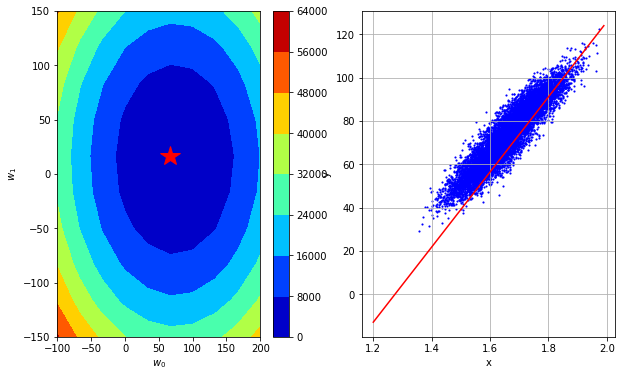

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [8]:
from gradient_descent import compute_gradient

Please fill in the functions `gradient_descent` below:

In [9]:
from gradient_descent import gradient_descent

Test your gradient descent function through gradient descent demo shown below:

In [17]:
from plots import gradient_descent_visualization

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, 
                                                max_iters=50, gamma=1)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434988977
Gradient Descent(1/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(2/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(3/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(4/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(5/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(6/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(7/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(8/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(9/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Gradient Descent(10/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.47971243498904

In [11]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)));

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

# 4 Stochastic gradient descent

In [22]:
from stochastic_gradient_descent import stochastic_gradient_descent

In [23]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size=1, max_iters=50, gamma=1)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434988977
Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Stochastic Gradient Descent: loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
Stochastic Gradient Descent: loss=30.771

In [24]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=max_iters))

interactive(children=(IntSlider(value=1, description='n_iter', max=50, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Gradient Descent(0/49): loss=27.286869623045305, w0=73.63227245973113, w1=14.475704876437266
Gradient Descent(1/49): loss=27.286869623045312, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent(2/49): loss=27.286869623045312, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent(3/49): loss=27.286869623045312, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent(4/49): loss=27.286869623045312, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent(5/49): loss=27.286869623045312, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent(6/49): loss=27.286869623045312, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent(7/49): loss=27.286869623045312, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent(8/49): loss=27.286869623045312, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent(9/49): loss=27.286869623045312, w0=73.63227245973111, w1=14.475704876437092
Gradient Descent(10/49): loss=27.286869623045312, w0=73.63227245973111

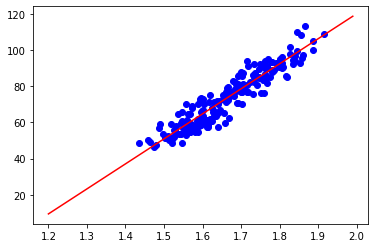

In [25]:
from plots import prediction

height, weight, gender = load_data(sub_sample=True, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, 
                                                max_iters=50, gamma=1)
w0, w1 = gradient_ws[-1]
pred_x, pred_y = prediction(w0, w1, mean_x, std_x)
fig, ax = plt.subplots()
ax.plot(height, weight, 'bo')
ax.plot(pred_x, pred_y, 'r-')

Gradient Descent(0/49): loss=131.86146020520675, w0=74.06780585492633, w1=11.034894865989184
Gradient Descent(1/49): loss=131.86146020520675, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(2/49): loss=131.86146020520675, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(3/49): loss=131.86146020520675, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(4/49): loss=131.86146020520675, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(5/49): loss=131.86146020520675, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(6/49): loss=131.86146020520675, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(7/49): loss=131.86146020520675, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(8/49): loss=131.86146020520675, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(9/49): loss=131.86146020520675, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(10/49): loss=131.86146020520675, w0=74.06780585492636

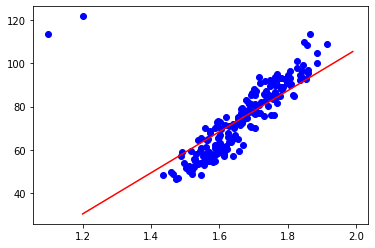

In [26]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, 
                                                max_iters=50, gamma=1)
w0, w1 = gradient_ws[-1]
pred_x, pred_y = prediction(w0, w1, mean_x, std_x)
fig, ax = plt.subplots()
ax.plot(height, weight, 'bo')
ax.plot(pred_x, pred_y, 'r-')

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [34]:
compute_loss(y, tx, (1,2), mae=True)

73.06780585492638

In [40]:
w = (73.29, 13.47)
e = y - tx @ w
-1/len(y) * tx.T @ e
print(tx)
print(w.shape)

[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ...
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


AttributeError: 'tuple' object has no attribute 'shape'

In [35]:
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters=500, gamma=1, mae=True)

Gradient Descent(0/499): loss=6.63738118807689, w0=74.06780585492633, w1=11.034894865989184
Gradient Descent(1/499): loss=6.637381188076931, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(2/499): loss=6.637381188076931, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(3/499): loss=6.637381188076931, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(4/499): loss=6.637381188076931, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(5/499): loss=6.637381188076931, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(6/499): loss=6.637381188076931, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(7/499): loss=6.637381188076931, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(8/499): loss=6.637381188076931, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(9/499): loss=6.637381188076931, w0=74.06780585492636, w1=11.034894865989102
Gradient Descent(10/499): loss=6.637381188076931, w0=74.06780585492636,